In [12]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 907 kB 7.9 MB/s 


In [13]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [14]:
# create datatest
n = 1000
omega = 0.5
alpha_1 = 0.2
alpha_2 = 0.3

beta_1 = 0.4
beta_2 = 0.5

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
  new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2)
  new_val = gauss(0,1) * new_vol

  vols.append(new_vol)
  series.append(new_val)

Text(0.5, 1.0, 'Similated GARCH(2,2) Data')

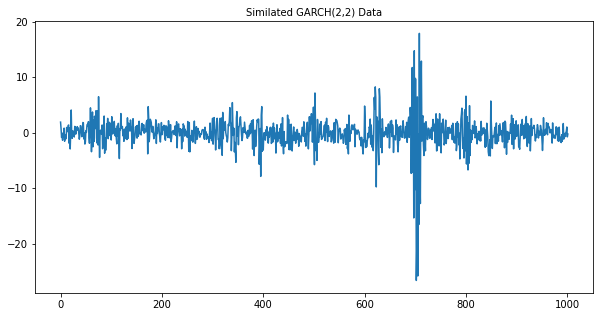

In [17]:
plt.figure(figsize=(10,5))
plt.plot(series)
plt.title('Similated GARCH(2,2) Data', fontsize=10)

Text(0.5, 1.0, 'Data Volatility')

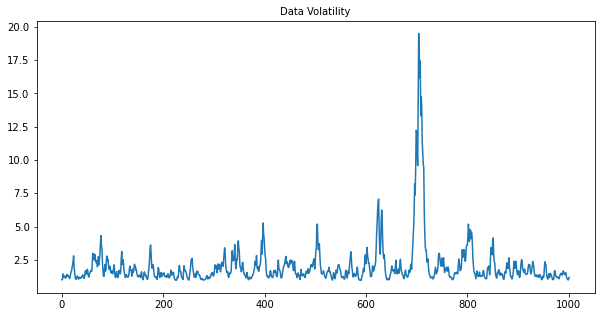

In [18]:
plt.figure(figsize=(10,5))
plt.plot(vols)
plt.title('Data Volatility', fontsize=10)

Text(0.5, 1.0, 'Data and Volatility')

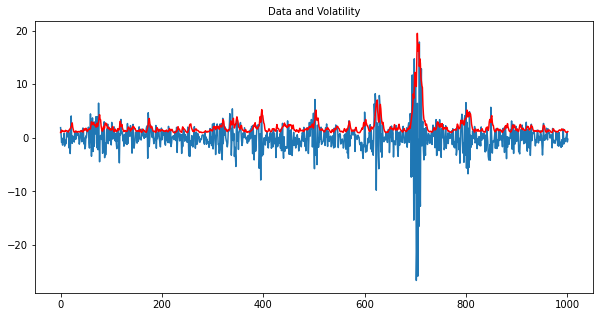

In [19]:
plt.figure(figsize=(10,5))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=10)

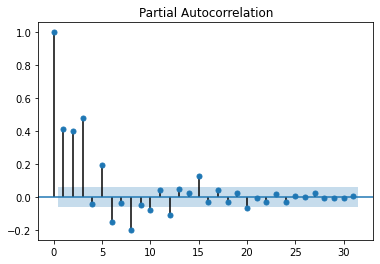

In [20]:
plot_pacf(np.array(series)**2)
plt.show()

In [21]:
train, test = series[:-test_size], series[-test_size:]

In [22]:
model = arch_model(train, p=2, q=2)


In [23]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 27241966385.41188
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1308767959.640266
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2023.935770205397
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1560499.5726525616
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2665.1455170624954
Iteration:      6,   Func. Count:     50,   Neg. LLF: 1826.3655403986604
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1890.1280096569735
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1805.324885288253
Iteration:      9,   Func. Count:     73,   Neg. LLF: 1804.6292433408148
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1804.3100691276136
Iteration:     11,   Func. Count:     87,   Neg. LLF: 1804.2553619153125
Iteration:     12,   Func. Count:     94,   Neg. LLF: 1804.2237580921383
Iteration:     13,   Func. Count:    101,   Neg. LLF: 1804.2203542762381
Iteration:     14,   Func. Count:    108,   Neg. LLF: 1

In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1804.22
Distribution:                  Normal   AIC:                           3620.44
Method:            Maximum Likelihood   BIC:                           3649.27
                                        No. Observations:                  902
Date:                Tue, Jan 03 2023   Df Residuals:                      901
Time:                        15:23:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0239  4.652e-02     -0.514      0.607 [ -0.115,6.726e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5453  9.913e-02      5.500  3.788e-08   [  0.351,  0.740]
alpha[1]       0.1547  4.215e-02      3.670  2.426e-04 [7.207e-02,  0.237]
alpha[2]       0.3781  7.330e-02      5.158  2.501e-07   [  0.234,  0.522]
beta[1]        0.3698      0.148      2.496  1.257e-02 [7.940e-02,  0.660]
beta[2]    9.4083e-15  9.207e-02  1.022e-13      1.000   [ -0.180,  0.180]
==========================================================================

Covariance estimator: robust
"""

In [25]:
predictions = model_fit.forecast(horizon=test_size)

/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


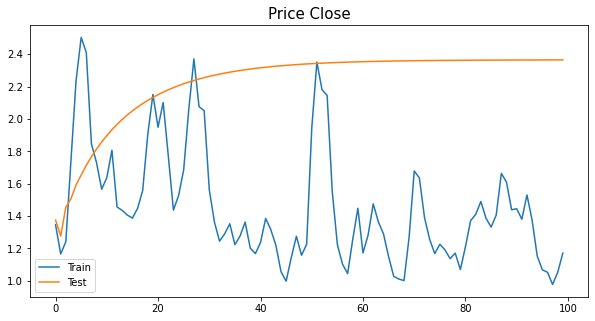

In [35]:
plt.figure(figsize=(10,5))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Price Close', fontsize=15)
plt.legend(['Train', 'Test'], fontsize=10)

/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


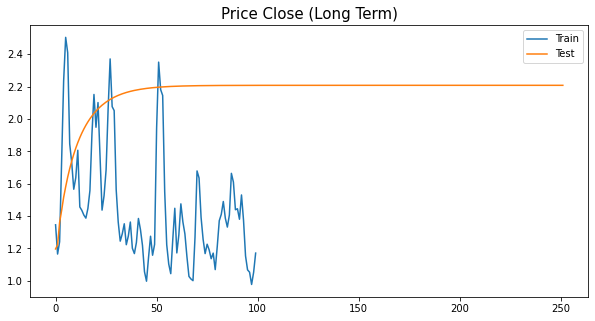

In [36]:
predictions_long_term = model_fit.forecast(horizon=252)
plt.figure(figsize=(10,5))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Price Close (Long Term)', fontsize=15)
plt.legend(['Train', 'Test'], fontsize=10)

In [37]:
prices_predictions = []
for i in range(test_size):
  train = series[:-(test_size-i)]
  model = arch_model(train, p=2, q=2)
  model_fit = model.fit(disp='off')
  pred = model_fit.forecast(horizon=1)
  prices_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

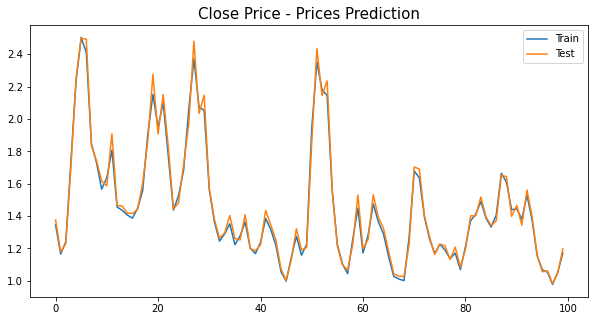

In [38]:
plt.figure(figsize=(10,5))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(prices_predictions)
plt.title('Close Price - Prices Prediction', fontsize=15)
plt.legend(['Train', 'Test'], fontsize=10)